# **Sistema Lineares**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Sistemas Lineares</a>
  </li>
  <ul>
      <li><a href="#scrollTo=dRkBMuF7ZtwR&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=RoOsu9Ppsd0v&uniqifier=1">Funções comuns</a></li>
    <li><a href="#scrollTo=6X8hhhuyhZHC&uniqifier=1">Método direto</a>
      <ul>
          <li><a href="#scrollTo=fvXmmrPMwIVa&uniqifier=1">Métodos</a></li>
          <li><a href="#scrollTo=Q1l9-tNWhuaq&uniqifier=1">Comparações</a></li>
      </ul>
    </li>
    <li><a href="#scrollTo=Ti2W5pc9VLcl&uniqifier=1">Método iterativo</a>
        <ul>
          <li><a href="#scrollTo=6X8hhhuyhZHC&uniqifier=1">Métodos</a></li>
          <li><a href="#scrollTo=Q1l9-tNWhuaq&uniqifier=1">Comparações</a></li>
      </ul>
    </li>
    <li><a href="#scrollTo=BP3sHmVDk-s1&uniqifier=1">Aplicações</a></li>
  </ul>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy import random

# Introdução

> $Ax = b$

"O vetor $b_m$ pode ser expresso como combinação linear das colunas de $A_{mn}$?"[1] 

> $a_{11}*x_{1} + \cdots + a_{1n}*x_{n} = b_{1}$
>
> $a_{21}*x_{1} + \cdots + a_{2n}*x_{n}= b_{2}$
>
> $\vdots$ 
>
> $a_{m1}*x_{1} + \cdots + a_{mn}*x_{n} = b_{m}$


# Funções Comuns

In [ ]:
import time

# @Decorator timeit
# Retorna o tempo de excução da função
# Não modifica a função.
# Para mais informações sobre decorators e timeit:
# https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__)
            kw['log_time'][name].append((te - ts) * 1000)
        else:
            print("%r  %2.5f ms" % (method.__name__, (te - ts) * 1000))
        return result
    return timed


**Foward Solution Ly = b**

>$L_{m,n} =
 \begin{pmatrix}
  l_{1,1} & 0 & \cdots & 0 \\
  l_{2,1} & l_{2,2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  l_{m,1} & l_{m,2} & \cdots & l_{m,n}
 \end{pmatrix}b_{m} =
 \begin{pmatrix}
  b_{1} \\
  b_{2} \\
  \vdots  \\
  b_{m}
 \end{pmatrix}$


> $y_1 = b_1/l_{11}$

>$\vdots$

> $y_{n} = b_n - \sum_{k=1}^{n} l_{ik}*y_{ik}$ 

In [ ]:

# recebe a matriz inferior triangular A, e o vetor b. Retorna o vetor solução y.
def forward_substitution(A, b):
  l = np.copy(A);
  y = np.copy(b); 
  n = np.shape(A)[0];

  for i in range(1, n):
    y[i] -= np.dot(l[i, 0:i], y[0:i]);
  return y;

**Back Solution Ux = y (then)**

>$U_{m,n} =
 \begin{pmatrix}
  u_{1,1} & u_{1,2} & \cdots & u_{1,n} \\
  0 & a_{2,2} & \cdots & u_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & u_{m,n}
 \end{pmatrix}
y_{m} =
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{m}
 \end{pmatrix}$

> $x_n = y_n/u_{nn}$

> $x_{n-1} = (y_{n-1}-x_{n}*u_{n-1n})/u_{n-1n-1}$ 


In [ ]:
# Recebe a matriz tringular superiror A e o vetor y, Ux = y, returna o vetor solução x
def back_substituion(A, y): 
  u = np.copy(A);
  x = np.copy(y);
  n = np.shape(A)[0];

  for i in range(n-1, -1, -1):
    x[i] = (x[i] - np.dot(u[i,i+1:n], x[i+1:n]))/u[i, i];

  return x;

## Determinante

O determinante da matriz U (triangular superior) é igual ao produto da diagonal.

> $|A| = |LU| = \det(LU) = \det(L) * \det(U) = det(U) = |U| = \prod_{i=1}^n u_{ii}$

In [ ]:
# Recebe U, a matriz triangular superior quadrada, retorna o determinante (O produto da diagonal) 
def determinante_upper_matrix(U):
  return U.diagonal().prod();

## Tipo de matrizes e propriedades

Propriedades:

Se a matriz não é singular, seu determinante determinantes é diferente de zero, então sabemos que há pelo menos uma solução.
> $x = A^{-1}*b$

Matrizes Singulares Positivas Definidas(SPD): pode ser criada com a multiplicação 

> $A = LL^{t}$
>
> ou
>
> $A = 0.5 * (Random_{nn} +  Random_{nn}^{t}) + (n * Id_{nn})$ 



In [ ]:
def get_special_spd(n = 3):
  A = np.zeros((n, n)) #cria matriz com tudo zero
  np.fill_diagonal(A[:, :], 6)      #diagonal principal
  np.fill_diagonal(A[1:, :-1], -4)  #digonal abaixo da principal
  np.fill_diagonal(A[:-1, 1:], -4)  #diagonal acima da principal
  np.fill_diagonal(A[:-2, 2:], 1)   #diagonal duas abaixo da principal
  np.fill_diagonal(A[2:, :-2], 1)   #diagonal duas cima da principal

  # Alguns valores distintos
  A[0, 0] = 9
  A[n-1, n-1] = 1
  A[n-2, n-2] = 5
  A[n-2, n-1] = -2
  A[n-1, n-2] = -2
  return A  

In [ ]:
def generate_matrix(n=3, tmatrix='random'):
    if(tmatrix=='spd-special'):
      return get_special_spd(n);

    if(tmatrix=='spd-hardcode'):
      return np.matrix([[6, 3], [5, 6]]);

    A =  np.random.rand(n, n);
    
    if(tmatrix=='spd-0'):
      return np.dot(A, np.transpose(A));
    
    if(tmatrix=='spd-1'):
      A = 0.5 * (A + np.transpose(A));
      return A + (n * np.eye(n));

    if(tmatrix=='spd-2'):
      return np.dot(np.tril(A, k = 0), np.transpose(np.tril(A, k = 0)));

    return A;
   

In [ ]:
def compare_direct:

In [ ]:
def plot_data():

In [ ]:
# - @function plot_stat_methods.
# - @param    *     : obriga o usuário a nomear o parametro quando chamar a função.
# - @param function : method1 primeiro metodo.
# - @param functon  : method2 segundo metodo.
# - @param string   : namef1 nome do primeiro metodo.
# - @param string   : namef2 nome do segundo metodo.
# - @param number   : maxn maximo tamanho da matriz.
# - @param number   : increment é o passo de testes, que vai de 10 até um número menor que n.
# - @param number   : e é o erro minimo.
# - @param string   : tmatrix é o tipo de matriz que será usada.
#   Plota o tempo e erro de dois métodos.
def plot_stat_methods(*, method1, method2, namef1, namef2, maxn = 600, increment = 100, tmatrix = 'random'):
  # Tempo gerado por execução
  logtime_data = {
     namef1 : [],
     namef2 : [],
  }

  # erro gerado por execução
  logerror_data = {
    namef1 : [],
    namef2 : [],
  } 

  x = [];
  for i in range(10, maxn, increment):
    A = generate_matrix(i, tmatrix);
    b = np.random.rand(i, 1);
    method1(A, b, log_time=logtime_data);
    method2(A, b, log_time=logtime_data);
    x.append(i);

  fig = plt.figure(figsize=(12,6));
  ax1 = fig.add_subplot(111);

  # Plot time
  ax1.plot(x, logtime_data.get(namef1), 'b', label= namef1 + " time",  linewidth=3.5);
  ax1.scatter(x, logtime_data.get(namef1), color='b');

  ax1.plot(x, logtime_data.get(namef2), 'y', label= namef2 + " time",  linewidth=3.5);
  ax1.scatter(x, logtime_data.get(namef2), color='y');

  # Sobre twinx: https://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-pyhttps://matplotlib.org/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py
  ax2 = ax1.twinx()
  color = 'tab:red'
  
  # Plot errors
  if( len(logerror_data.get(namef2)) > 0 ):
      ax2.plot(x, logerror_data.get(namef2), 'g--',  linewidth=0.8);
      ax2.scatter(x, logerror_data.get(namef2), label= namef2 + ' errors', marker='o', color='g');

  if( len(logerror_data.get(namef1)) > 0 ):
    ax2.plot(x, logerror_data.get(namef1), 'r--', linewidth=0.8);
    ax2.scatter(x, logerror_data.get(namef1), label= namef1 + ' errors', marker='o', color='r');

  # legendas e axes
  ax1.set(title="Tempo(s) de execução em função de n", xlabel="Tamanho n", ylabel="Tempo(s)");
  ax2.set_ylabel('Erros', color=color);
  ax1.legend(loc="best", fontsize='large');
  ax2.legend(loc="best", fontsize='large');

  plt.show()

# **Métodos diretos**


**Solve Ax = b**

> $Ax = (LU)x = b$
>
> $L(Ux) = b$
>
> $Ly = b$    // foward solution
>
> $Ux = y$    // back solution

In [ ]:
# Recebe a matriz U, o vetor y e retorna a solução x 
def u_solve(U, y):
    return back_substituion(U, y);

In [ ]:
# Recebe a matriz LU, o vetor b e retorna a solução x 
def lu_solve(LU, b):
    y = forward_substitution(LU, b);
    return back_substituion(LU, y);

##O método de Gaus

O método de Gaus consiste em obter a matriz triangular inferior utilizando apenas operações elementares na forma matricial.

Elas são, sobre a matriz A:

1. Tocar duas linhas de A, o que muda o sinal de |A|.
2. Multiplicar uma linha por um escalar $a$, diferente de zero, o que implica $a|A|$.
3. Multiplicar uma linha e subtrair de uma linha. 

Para eliminar um termo $A_{i+kj}$, usamos o termo $A_{ij}$, em que $k = i + 1, ... n$

> $a = A_{i+1j} / A_{ij}$
>
> $A_{i+1j} = A_{i+1j} - a*A_{ij} = 0$
>

Operação para modificar uma coluna:
> $A_{ij} = A_{ij} +- a * A_{kj}, j = k, k + 1, ..., n$
>
> $b_i = b_i - a*b_k$

Com A transformada em U, agora podemos fazer:
> $Ux = y$



In [ ]:
# Recebe a matriz A, o vetor b e retorna a matriz aumentada [U/y]
def Gauss_decomposition(A, b):
  u = np.copy(A);
  y = np.copy(b);
  n = np.shape(A)[0];

  for k in range(0, n-1):
    for i in range(k+1, n):
      m = 0.0;
      if(u[i, k] != 0):
        m = u[i, k]/u[k, k]
        u[i, k+1:n] -= m*u[k, k+1:n];
        y[i] -= m*y[k]; 

  return [u, y]

In [ ]:
@timeit
def Gauss_method(A, b, **kwargs):
  u, y = Gauss_decomposition(A, b)
  return back_substituion(u, y)

##O método da decomposição LU

Decompoẽ a matriz A em LU. Multiplicando a forma idela de L e U obtem-se a seguinte expressão:

>$A_{m,n} =
 \begin{pmatrix}
  u_{1,1} & u_{1,2} & u_{1,3} \\
  u_{1,1}*l_{2,1} & u_{1,2}*l_{2,1} + u_{2,2}  & u_{1,3}*l_{2,1} + u_{2,3} \\
  u_{1,1}*l_{3,1} & u_{12}*l_{3,1} + u_{2,2}*l_{3,2} &  u_{13}*l_{3,1} + u_{2,3}*l_{3,2} + u_{3,3}
 \end{pmatrix}$

Assim, podemos notar que de $ k = 0...n-1$ e $i = k + 1,..., n$ os termos $a_{ik}/a_{kk} = l_{ik}$ e aplicando a eliminação de Gauss obteremos a matriz triangular superior U.

In [ ]:
# Recebe a matriz A, retorna a matriz aumentada [L/U]
def LU_decomposition(A):
  LU = np.copy(A);
  n = np.shape(A)[0];

  for k in range(0, n-1):
    for i in range(k+1, n):
      if(LU[i, k] != 0):
        m = LU[i, k]/LU[k, k]
        LU[i, k+1:n] -= m*LU[k, k+1:n];
        LU[i, k] = m;

  return LU

##O método de Gaus com pivoteamento

O pivoteamento é uma forma de preprocessar a matriz antes do método de Gauss devido aos dois seguintes casos:

>$A_{m,n} =
 \begin{pmatrix}
  0 & -1 & 1 & | 0\\
  -1 & 2 & -1 & | 0 \\
  2 & -1 & 0 & |  1 \\
 \end{pmatrix}$
>$A_{m,n} =
 \begin{pmatrix}
  e & -1 & 1 & | 0\\
  -1 & 2 & -1 & | 0 \\
  2 & -1 & 0 & |  1 \\
 \end{pmatrix}$

Em que $1 > e > -1$.

O pivoteamento reorganiza a matriz visando obter a matriz mais proxima com diagonal dominante, a qual pode ser definida como a matriz que tem a soma das linhas (sem contar elementos da diagonal principal) menor que o elemento diagonal. 

No algoritmo abaixo, o melhor pivor é escolhido em relação ao maior tamanho relativo. O tamanho relativo é o valor do elemento normalizado pelo maior elemento contido na mesma linha: $r_{ij} = \max_j (|A_{ij}| / max(A_{i}), j \geq k$


In [ ]:
# Recebe a matriz A, os indexes i e j, referente as duas linhas que comutarão.
def swap_row(A, i, j):
  if(len(A.shape) == 1):
    A[i], A[j] = A[j], A[i]
  else:
    tmp = np.copy(A[i, :])
    A[i, :] = np.copy(A[j, :])
    A[j, :] = np.copy(tmp[:])

In [ ]:
# Recebe a matriz A, e o vetor b. Returna [U|y] (matriz aumentada)
def gauss_pivot(A, b):
  U = np.copy(A);
  y = np.copy(b);
  n = np.shape(A)[0];
  tol=1.0e-9
  
  s = np.zeros([n], dtype=np.float64);

  # escolhe-se os maiores elementos de cada linha.
  for i in range(0, n):
    s[i] = np.max(np.abs(U[i, :]))
  
  # pivoteamento
  for k in np.arange(n-1):
    # A próxima linha é aquela que possivel o elemento com maior tamnho relativo. 
    p = int(np.argmax(np.abs(U[k:n, k]/s[k:n]))) + k
    if(np.abs(U[p, k]) < tol):
      print('Matriz singular!');
      return [A, b]
    if(p != k):
      swap_row(U, p, k)
      swap_row(y, p, k)
      swap_row(s, p, k)

    # eliminação de Gauss
    for i in range(k+1, n):
      m = 0.0;
      if(U[i, k] != 0):
        m = U[i, k]/U[k, k]
        U[i, k+1:n] -= m*U[k, k+1:n];
        y[i] -= m*y[k]; 

  return [U, y]

Funções finais:

In [ ]:
@timeit
def LU_method(A, b, **kwargs):
  LU = LU_decomposition(A);
  return lu_solve(LU, b); 

In [ ]:
@timeit
def Gauss_pivot_method(A, b, **kwargs):
  U, y = gauss_pivot(A, b);
  return u_solve(U, y);

##O método de Cholesks

Esse método decompoẽ uma matriz simétrica e positiva definida na matriz L.

> $A = LL^t = LU => U = L^t$

Analisando a multiplicação acima, pode-se concluir que:

Se $i = j$

> $L_{jj} = \sqrt (A_{jj} -\sum_{k=1}^{j-1} L_{j,k}^2), j = 2, 3, ..., n$

Se $i \neq j$

> $L_{ij} = \sqrt (A_{ij} -\sum_{k=1}^{j-1} L_{i,k}*L_{j,k}) / L_{jj}, j = 2, 3, ..., n$

In [ ]:
# Recebe a matrix simetrica, positiva definida A = L @ (^t)
def choleskis_decomposition(A):  
  L = np.copy(A);
  n = np.shape(A)[0];

  for i in range(0, n):
    # try:
    L[i, i] = np.sqrt(L[i, i]-np.dot(L[i, 0:i], L[i, 0:i]));
    # except ValueError:
    #   error.err('Not a define posit]ive Matrix');  
    for k in range(i+1, n):
      L[k,i] = (L[k,i] - np.dot(L[k, 0:i], L[i, 0:i]))/L[i,i];
  # for k in range(1, n):
  #   L[0:k, k] = 0.0;
  return L;

In [ ]:
@timeit
def choleskis_solve(A, b, **kwargs):
  L = choleskis_decomposition(A);
  # U = np.transpose(L);
  # y = forward_substitution(L, b);
  # return back_substituion(U, y);


In [ ]:
def check_answer(A, b, x):
  if(np.allclose(np.dot(A, x), b)):
    print("The answer is correct!", x);
  else:
    print("The answer is wrong!", x);

Simples testes para verificar a assertividade dos métodos.

In [ ]:
tmp_n = 3
R = generate_matrix(tmp_n, 'random');
SPD1 = generate_matrix(tmp_n, 'spd-1');
SPD2 = generate_matrix(tmp_n,'spd-2');
SPD3 = generate_matrix(tmp_n,'spd-3')
b = np.random.rand(tmp_n, 1);

In [ ]:
U, y = gauss_pivot(SPD2, b);
x = u_solve(U, y);
check_answer(SPD2, b, x);
print("python answer", np.linalg.solve(SPD2, b));

The answer is correct! [[9573.32093597]
 [ -94.39701439]
 [  21.8673842 ]]
python answer [[9573.32093597]
 [ -94.39701439]
 [  21.8673842 ]]


In [ ]:
LU = LU_decomposition(SPD2);
x = lu_solve(LU, b);
check_answer(SPD2, b, x);
print("python answer", np.linalg.solve(SPD2, b));

The answer is correct! [[-308.05123687]
 [ 292.15589485]
 [  -4.14677491]]
python answer [[-308.05123687]
 [ 292.15589485]
 [  -4.14677491]]


In [ ]:
x = Gauss_method(SPD2, b);
check_answer(SPD2, b, x);
print("python answer", np.linalg.solve(SPD2, b));

The answer is correct! [[9573.32093597]
 [ -94.39701439]
 [  21.8673842 ]]
python answer [[9573.32093597]
 [ -94.39701439]
 [  21.8673842 ]]


# **Sistemas lineares diretos: Comparativo entre os métodos**

## Decomposição LU x Gauss

O método de Gauss transforma o sistema $Ax = b$ em $Ux = y$, enquanto o LU transforma $A$ na sua forma triangular superior. Uma diferença, portanto, é que se aplicarmos a LU em uma problema em um b varia a cada teste e A é o mesmo, então a LU pode obter vantagem. Um exemplo disto é o calculo da matriz inversa, discutido na seção de aplicações.

No handles with labels found to put in legend.


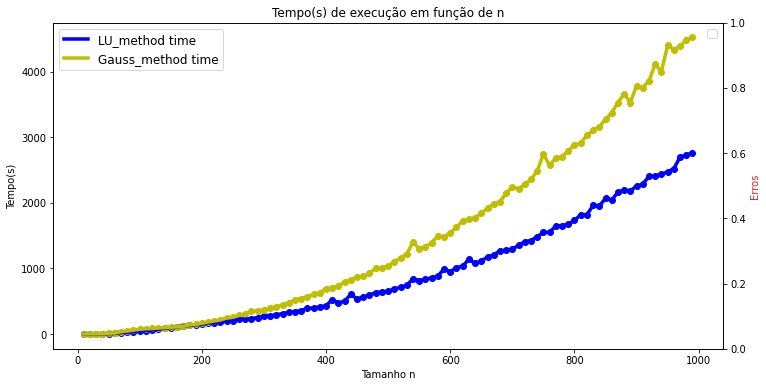

In [ ]:
plot_stat_methods(method1= LU_method, method2= Gauss_method, namef1= 'LU_method', namef2= 'Gauss_method', maxn = 1000, increment = 10, tmatrix= 'spd-2');

## Decomposição com e sem pivoteamento.


No handles with labels found to put in legend.


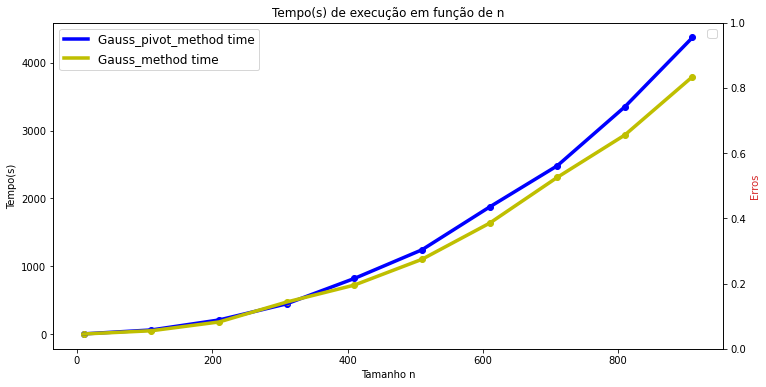

In [ ]:
plot_stat_methods(method1= Gauss_pivot_method, method2= Gauss_method, namef1= 'Gauss_pivot_method', namef2= 'Gauss_method', maxn = 1000, increment = 100, tmatrix= 'spd-1');

## Decomposição  de Cholesk e Gauss com pivoteamento.

No handles with labels found to put in legend.


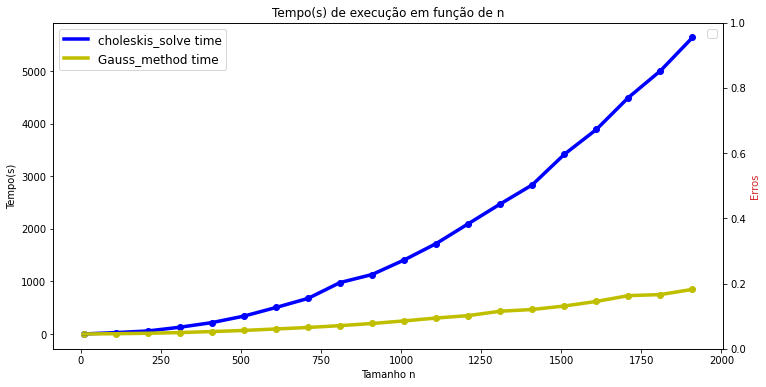

In [ ]:
plot_stat_methods(method1= choleskis_solve, method2= Gauss_method, namef1= 'choleskis_solve', namef2= 'Gauss_method', maxn = 2000, increment = 100, tmatrix= 'spd-special');

# **Métodos iterativos**

Para resolver o sistema linear de ordem n, $Ax = b$, e $det(A) \neq 0$, os métodos seguintes chutam uma solução incial $x^{(0)}$ e a cada iteração do método é gerado um novo vetor $x^{(i+1)} = x^{k}$ tal que esse novo vetor está convergindo para a solução: 

$\lim_{x\to\infty} ||x^{(k)}-x|| = 0$ e ${x^{(k)} \to x}$


## **Gauss-Seidel**


In [ ]:
def interEqs(x, w = 1.0):
  for i in arange(len(x)):
    x[i] = (w*(b[i] - np.dot(a[i,:], x[:]) + np.dot(a[i, i], x[i]))/a[i,i])-((1-w)*x[i])
  return x

In [ ]:
def gauss_seidel(x, n, tol=1.0e-9):
  w = 1.0
  p = 1
  k = 10
  for i in arange(1,n):
    xOld = np.copy(x)
    x = interEqs(x, w)
    dx = np.sqrt(np.dot(x-xOld, x-xOld))
    if(dx < tol):
      return [x, i]
    if(i == k):
      dx1 = dx
    if(i == k + p):
      dx2 = dx
      w = 2.0/(1.0 + np.sqrt(1.0-(dx2/dx1)))

  print("No converge for ", tol)
  return  [-1]

## **Gauss-Jacobi**

$Ax = b \to Gauss-jacobi(A, b) \to x^{(k+1)} = C*x^{(k)} + g$

> $x_1 = (b_1 - (a_{12}*x_2 - a_{13}*x_3 + \dots + a_{1n}*x_{n}) )/a_{11}$
> 
> $x_2 = (b_2 - (a_{11}*x_1 - a_{13}*x_3 + \dots + a_{2n}*x_{n}))/a_{22}$
> 
> $\vdots$
>
> $x_n = (b_n - (a_{n2}*x_2 - a_{13}*x_3 + \dots + a_{nn-1}*x_{n-1}))/a_{nn}$

>$C_{n,n} =
 \begin{pmatrix}
  0 & -a_{1,2}/a_{11} & \cdots & -a_{1,n}/a_{11} \\
  -a_{21}/a_{22} &   0 & \cdots & -a_{2,n}/a_{22} \\
  \vdots  & \vdots  & \ddots & \vdots \\
  -a_{n1}/a_{nn} & -a_{n2}/a_{nn} & \cdots & 0 \\
 \end{pmatrix}$

> $g = [b_1/a_{11}, \dots, b_n/a_{nn}]$

Agora, escolhemos dois critério de parada para decidir o fim das iterações: O primeiro decidirá se a solução está convergindo e será dado por kmax, que é o limite de interações. O segundo será o teste de resíduo, que diz se a solução está convergindo para zero.

Teste do resíduo:

> $||b-A*x^{(k)}||| < e$

Outra forma de chegar a C e g, é usando a matriz diagonal D que tem a diagonal de A. 

> $Ax = b \to (A-D+D)x=b \to (A-D)x^{(k)} + Dx^{(k+1)}=b$

Multiplicando os dois lados por $D^{-1}$

> $(A-D)x^{(k)} + Dx^{(k+1)}=b$
>
> $x^{k+1} = (I - D^{-1}A)x^{k} + D^{-1}b $

Para calcular a multiplicação $D^{-1}A$, usamos `np.linalg.solve(A, b)`, que resolve $Ax = b$, então:

> $Dx = b \to x = D^{-1}A$

> $Dx = g \to x = D^{-1}g$

In [ ]:
def gauss_jacobi(A, b, x0, e=1e-9):
    n = np.shape(A)[0];
    D = np.diag(np.diag(A));
    I = np.eye(n)
    D_iA = np.linalg.solve(D,A)
    C = I - D_iA; 

    print(np.diag(A))
    print(np.diag(np.diag(A)))

    g = np.linalg.solve(D,b);
    kmax = 10000; k = 0;

    error = np.zeros(kmax); 
    test = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
   
    while test:
        error[k] = np.linalg.norm(b-np.dot(A,x0));
        k = k+1;
        x0 = C.dot(x0) + g;
        test = (np.linalg.norm(b-np.dot(A, x0)) > tol and k < kmax);
    
    if (k == kmax):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x, k, error

## Aplicações

## Calculo de densidades

![Provetas](https://www.researchgate.net/publication/321584117/figure/fig5/AS:569090473709574@1512693150597/Figura-5-Etapas-de-teste-de-proveta-e-regioes-formadas-durante-a-sedimentacao-FAUST.png)

Figura: imagem da analise de acumulo de sedimentos

A partir da relação $massa(m) = densidade(d) / volume(v)$, queremos descobrir a densidade $d_a$, $d_b$, $d_c$, $d_d$ dos respectivos liquidos A, B, C e D.

Porém apenas temos como estimar os volumes dos liquidos. Por exemplo, o liquido B na proveta 1, $v_{1b}$, na proveta 2, $v_{2b}$, do liquido A na proveta 2, $v_{2a}$, e assim adiante.

Para cada proveta, também sabemos as massas contidas ali dentro, desconsiderando as massas das provetas, sendo estas respectivamente, $m_1$, $m_2$, $m_3$ e $m_4$. Com essas informações, temos o seguinte sistema:

> $v_{1a}*d_{a} + \cdots + v_{1d}*d_{d} = m_{1}$
>
> $v_{2a}*d_{a} + \cdots + v_{2d}*d_{d}= m_{2}$
>
> $v_{3a}*d_{a} + \cdots + v_{3d}*d_{d} = m_{3}$
>
> $a_{4a}*d_{a} + \cdots + v_{4d}*d_{d} = m_{4}$



## Representação das cores

Podemos representar as cores como a adicação entre R(Red), G(Green), B(Blue), sendo a menor intensidade de cada cor é 0 e a maior é 1.

A representação da cor $i$ então será: $C_i = (R_i, G_i, B_i) = R_i(1, 0, 0) + G_i(0, 1, 0) + B_i(0, 0, 1)$.

Defini-se também que a quantidade da cor gerada é no máximo 1 e assim as cores que forma $C_i$ não devem exceder essa quantidade: $x_a + x_b + x_c = 1$.

Uma mistura entre três cores pode ser representada como:
$C = (C_1, C_2, C_3) = (1/4, 2/4, 1/4)$ e teremos o seguinte sistema linear:

> $R_1*x_a + R_2*x_b + R_3*x_c = 1/4$
>
> $G_1*x_b + G_2*x_b + R_3*x_c = 2/4$
>
> $B_1*x_c + B_2*x_b + R_3*x_c = 1/4$
>
> $x_a + x_b + x_c = 1$

Referências em [2]




## Calcular o inverso da Matriz

> $J @ J^{-1} = I_d$

> $J^{-1} = V$

Podemos extrair, para cada coluna de $I_d$, o seguinte sistema linear:

Primeira coluna:
> $| j_{11} j_{12} | |v_{11} | = 1 $
>
> $| j_{21} j_{22} | |v_{21} | = 0 $


Segunda coluna:
> $| j_{11} j_{12} | |v_{12} | = 0 $
>
> $| j_{21} j_{22} | |v_{22} | = 1 $

In [ ]:
def inverter_matrix(J, system_solve):
  n = np.shape(J)[0]
  Id = np.zeros([n, n])
  np.fill_diagonal(Id[:, :], 1) 

  for i in range(n):
    Id[:, i] = system_solve(J, Id[:, i],)

  return Id;

# Referências

[1] Scientific Computing An Introductory Survey, capitulo 2, System of Linear Equations.

[2] IME curso Calculo Númerico IAG-2005, resumo colli, capitulo 1, 2, 3.

[3] Datacamp, tutorial matplotlib, Julho 10, 2020. Disponivel em: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python